# Importing Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
import keras_tuner as kt
import tensorflow as tf

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Importing Dataset

In [2]:
filepath = r"C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\mobile_price_classification.csv"

dataset = pd.read_csv(filepath)

In [3]:
#Creating a copy of the data 

data = dataset.copy()

In [4]:
data.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0            842          0          2.2         0          1   0           7   
1           1021          1          0.5         1          0   1          53   
2            563          1          0.5         1          2   1          41   
3            615          1          2.5         0          0   0          10   
4           1821          1          1.2         0         13   1          44   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    0.6        188        2  ...         20       756  2549     9     7   
1    0.7        136        3  ...        905      1988  2631    17     3   
2    0.9        145        5  ...       1263      1716  2603    11     2   
3    0.8        131        6  ...       1216      1786  2769    16     8   
4    0.6        141        2  ...       1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

# EDA

In [5]:
data.shape

(2000, 21)

In [6]:
data.info()
#no missing values
# All the features are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [7]:
data.describe()

battery_power  bluetooth  clock_speed     dual_sim    front_cam  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

                4G   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

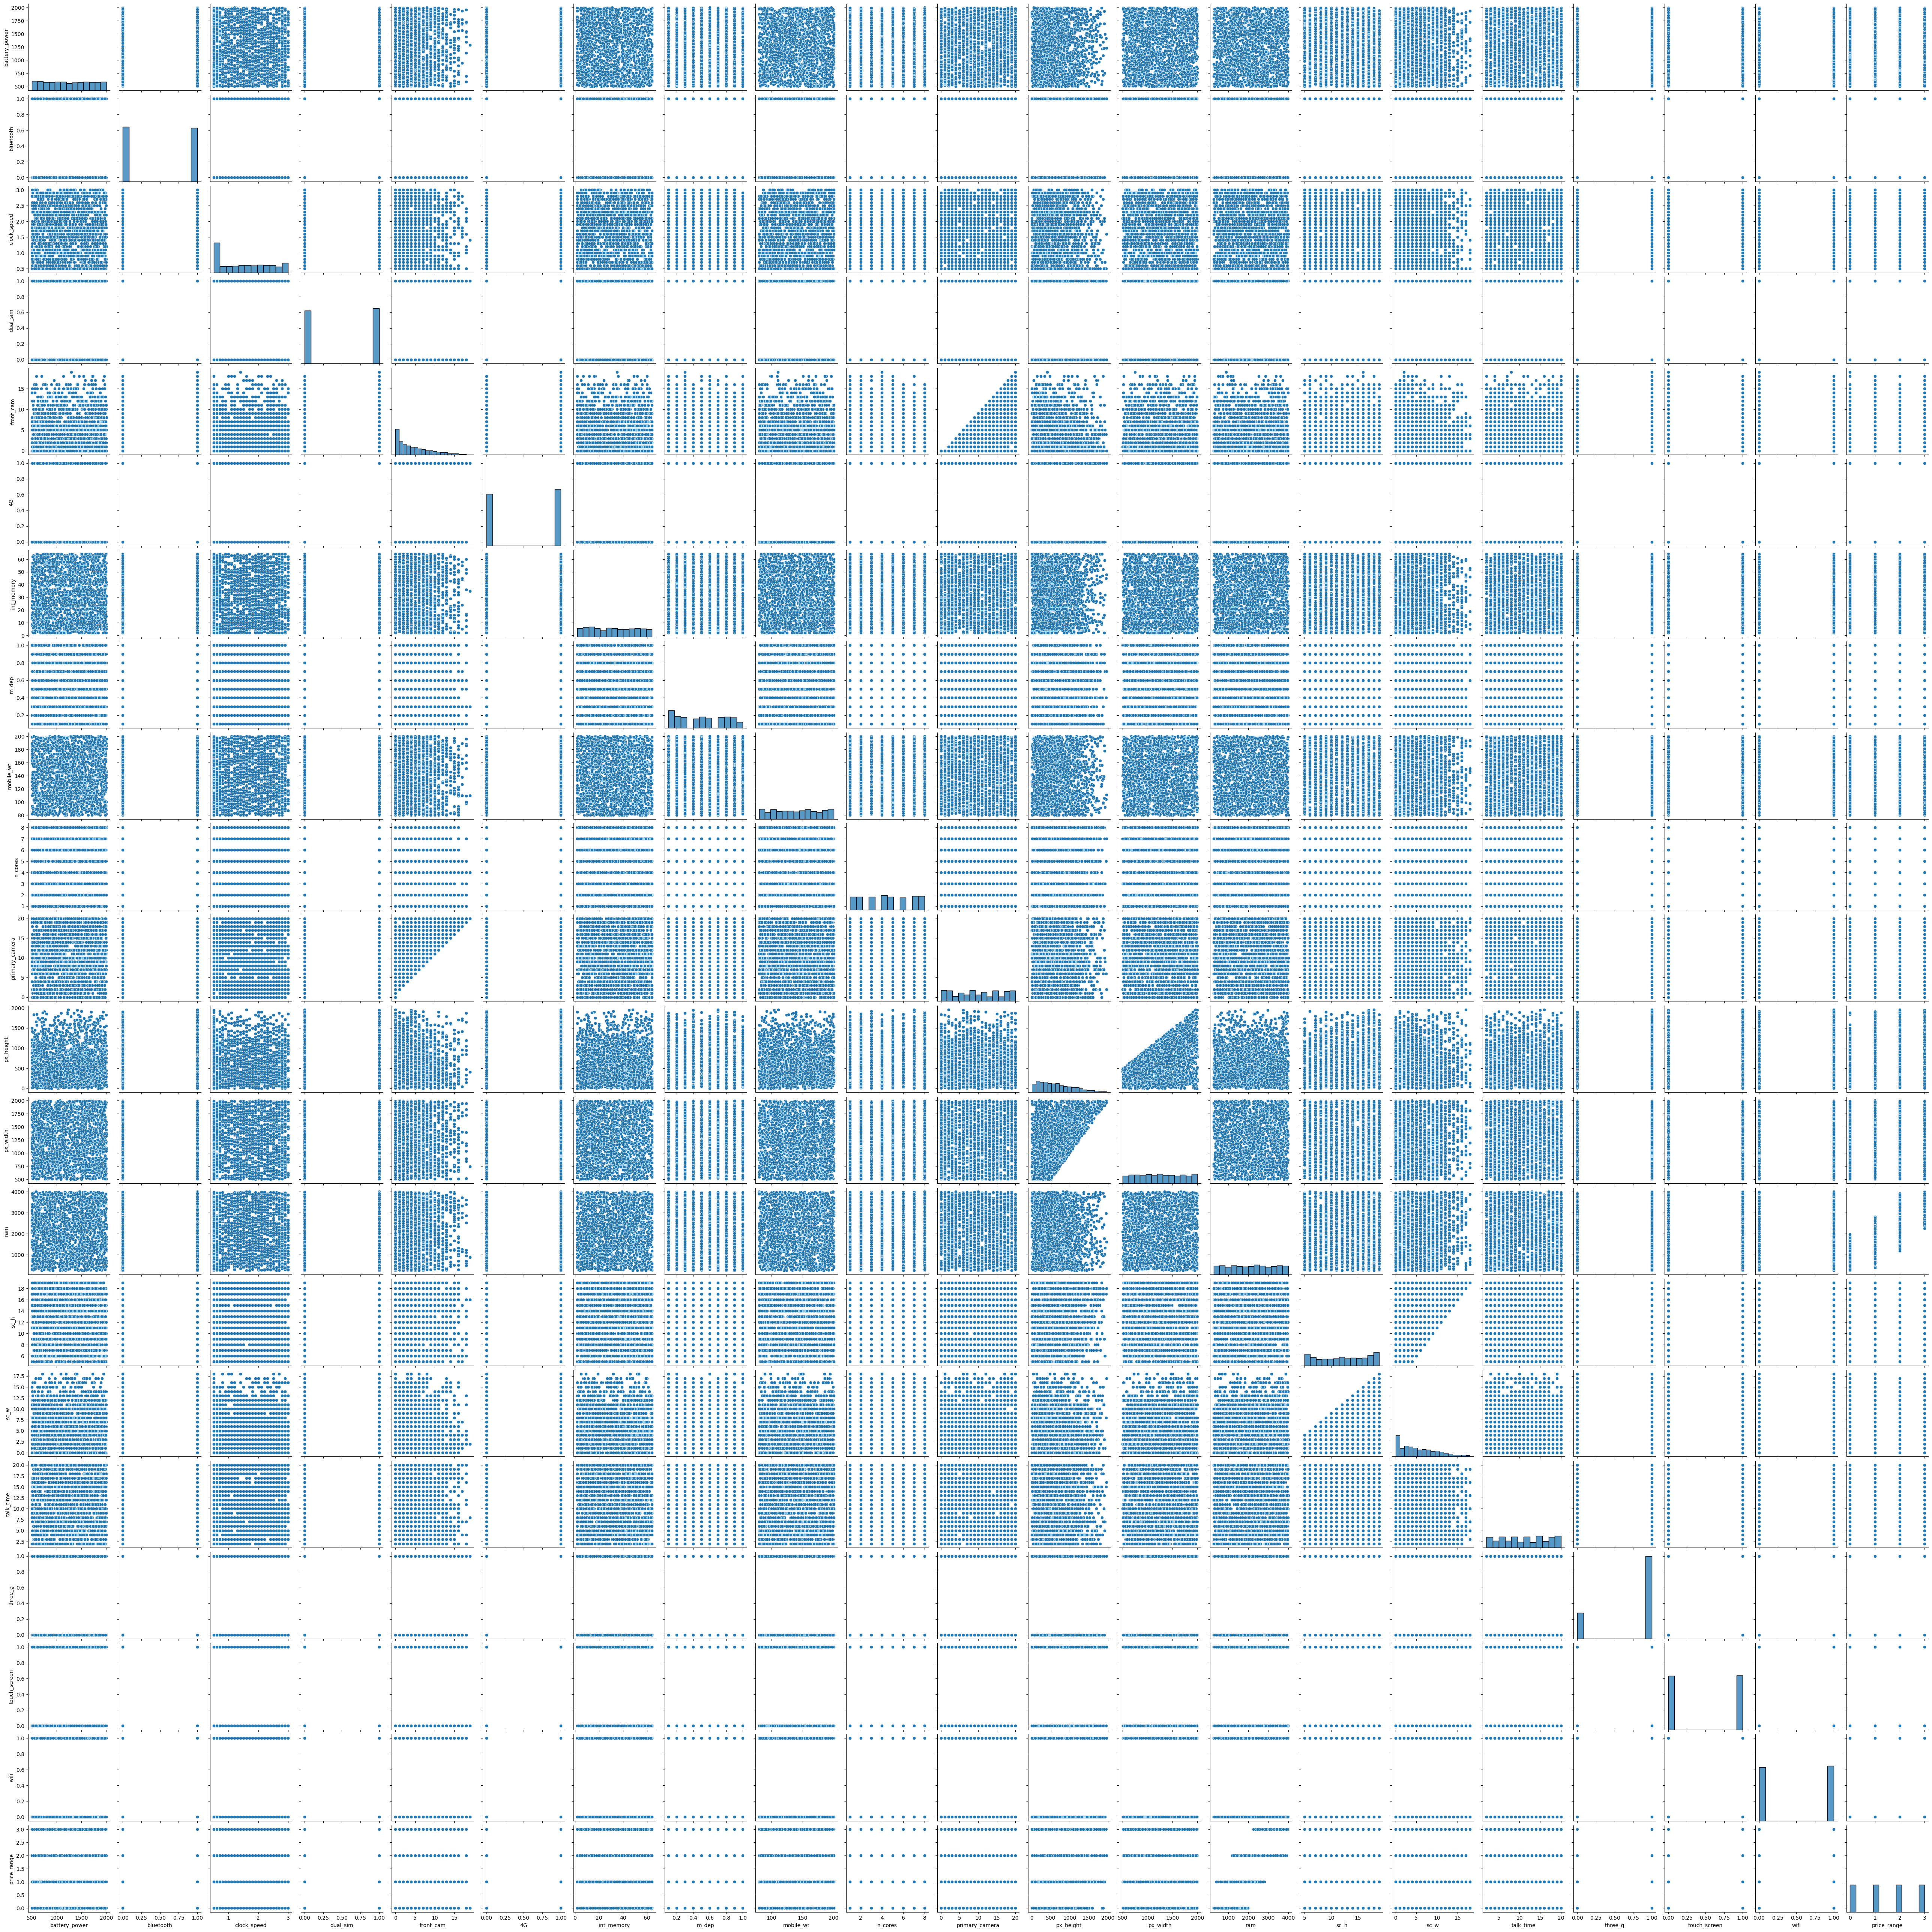

In [10]:
sns.pairplot(data)

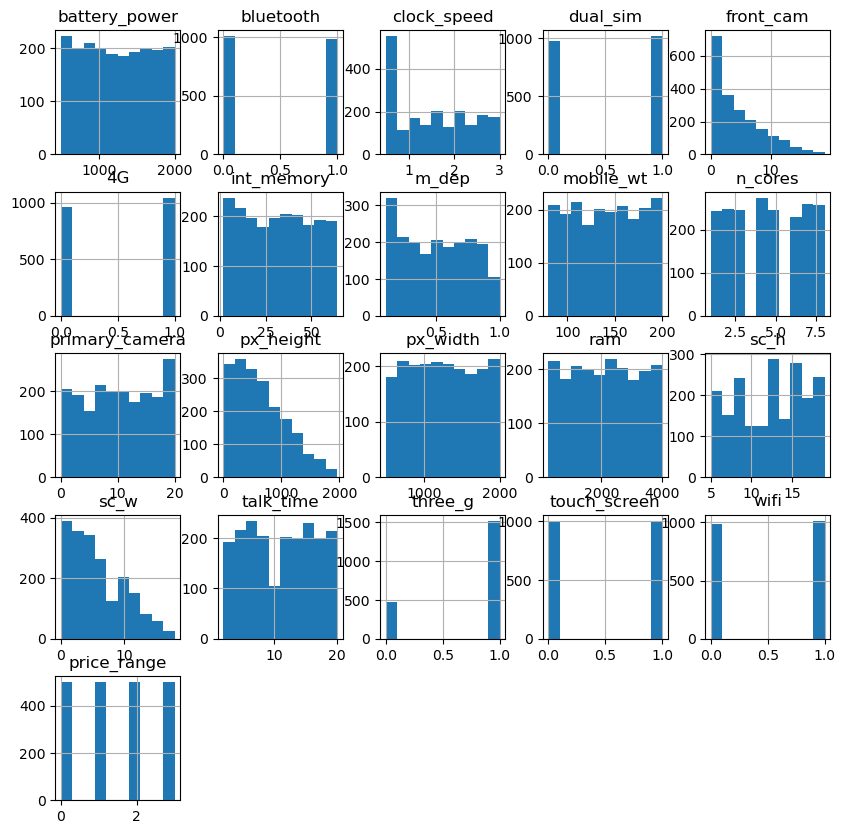

In [12]:
data.hist(figsize=(10,10))
plt.show()

#  Feature target split

In [65]:
x = data.drop('price_range', axis = 1)
y = data[['price_range']]

# Train Test Split

In [66]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0 )

# Encoding

In [68]:
# One hot encoding the target column for the application of softmax function

encoder = OneHotEncoder(sparse_output= False)
y_train_encoded = encoder.fit_transform(y_train)

y_train_encoded

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

# Scaling

In [69]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


# ANN Modeling

In [80]:
#Creating a sample ann model

model = Sequential()

#1st layer 
model.add(Dense(10,activation= 'relu', input_dim = 20))

#2nd layer
model.add(Dense(10, activation= 'relu'))

#output
model.add(Dense(4, activation='softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

d:\Code\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.fit(x_train_scaled, y_train_encoded, epochs=20, verbose=1)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2575 - loss: 1.5436
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2416 - loss: 1.4190
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2892 - loss: 1.3689
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3277 - loss: 1.3289
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3745 - loss: 1.3005
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 1.2457
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4625 - loss: 1.2059
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5158 - loss: 1.1157
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5661 - loss: 1.0330
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6100 - loss: 0.9026
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6499 - loss: 0.8028
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - lo

In [94]:
y_pred = model.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [95]:
y_pred.round()

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [148]:
encoder.inverse_transform(y_pred)[:10]

array([[3],
       [0],
       [2],
       [2],
       [3],
       [0],
       [0],
       [3],
       [3],
       [1]], dtype=int64)

In [98]:
confusion_matrix(y_test, encoder.inverse_transform(y_pred))

array([[ 89,   6,   0,   0],
       [  8,  74,  10,   0],
       [  0,   4,  84,  11],
       [  0,   0,   3, 111]], dtype=int64)

In [103]:
accuracy_score(y_test, encoder.inverse_transform(y_pred))

0.895

# Hyper Parameter Tuning

In [119]:
def model_tuner(hp):

    model = Sequential()
    #The input layer
    model.add(Dense(hp.Int('units', min_value = 10, max_value = 128, step = 8), 
                    activation= hp.Choice('activation', ['relu', 'sigmoid','tanh']),
                     kernel_initializer = 'uniform',
                     kernel_regularizer = l2(hp.Float('l2_regularizer', min_value =1e-5, max_value =1e-2, sampling = 'log'))
                      ))

    #Adding Hidden Layers
    for i in range(hp.Int('layers',1,4)):
        model.add(Dense(hp.Int(f'unit_{i}', min_value = 10, max_value =128, step = 16),
                        activation = hp.Choice('activation', values = ['relu', 'sigmoid','tanh']),
                        kernel_regularizer = l2(hp.Float('l2_regularizer', min_value =1e-5, max_value =1e-2, sampling = 'log'))
                        ))
        
        model.add(Dropout(hp.Float('dropout_rate',min_value = 0.2, max_value = 0.5, step =0.1)))
        
    #Output layer
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer = tf.keras.optimizers.get({'class_name': hp.Choice('optimizer', values = ['adam', 'sgd','rmsprop']), 
                                                              'config': {'learning_rate': hp.Float('learning_rate', min_value = 1e-5, max_value = 1e-1, sampling = 'log')}
                                                              }),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model



In [120]:
tuner = kt.RandomSearch(
    model_tuner,
    objective = 'val_accuracy',
    max_trials = 10,
    directory = r"C:\Users\padma\Desktop\Computer_Science\al-ml\Assignments_and_case_study\Assignement_tuning",
    project_name = 'Assignment_4_tuner_1' 
)

In [121]:
tuner.search(
    x_train_scaled,y_train_encoded,
    epochs = 20,
    validation_split = 0.2,
    verbose =1
)

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.8968750238418579

Best val_accuracy So Far: 0.96875
Total elapsed time: 00h 02m 41s


In [123]:
tuner.results_summary(num_trials=2)

Results summary
Results in C:\Users\padma\Desktop\Computer_Science\al-ml\Assignments_and_case_study\Assignement_tuning\Assignment_4_tuner_1
Showing 2 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
units: 114
activation: tanh
l2_regularizer: 4.511050960286944e-05
layers: 3
unit_0: 42
dropout_rate: 0.2
optimizer: adam
learning_rate: 0.00020410595674234664
unit_1: 106
unit_2: 74
unit_3: 122
Score: 0.96875

Trial 05 summary
Hyperparameters:
units: 74
activation: tanh
l2_regularizer: 0.0024228678768360994
layers: 4
unit_0: 106
dropout_rate: 0.30000000000000004
optimizer: rmsprop
learning_rate: 0.00043957433903517366
unit_1: 74
unit_2: 26
unit_3: 42
Score: 0.9593750238418579


# Building the model with best parameters

In [131]:
new_model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])

In [133]:
new_model.fit(x_train_scaled, y_train_encoded, epochs= 50, batch_size= 100,verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 0.1932 
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9305 - loss: 0.1948 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9410 - loss: 0.1918 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9327 - loss: 0.1978 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9386 - loss: 0.1795 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - loss: 0.1835 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9372 - loss: 0.1700 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9383 - loss: 0.1672
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9413 - loss: 0.1711 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9292 - loss: 0.1874 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9374 - loss: 0.1664 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

# Prediction

In [135]:
y_pred = new_model.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


# Evaluation

## Train data

In [136]:
score, acc = new_model.evaluate(x_train_scaled, y_train_encoded, batch_size= 100)

print('Train Score: ', score)
print('Train Accuracy: ', acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.0742  
Train Score:  0.07392586767673492
Train Accuracy:  0.9793750047683716


# Test data

In [137]:
score, acc = new_model.evaluate(x_test_scaled, encoder.transform(y_test), batch_size= 100)

print('Test Score: ', score)
print('Test Accuracy: ', acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9653 - loss: 0.1062
Train Score:  0.10716260224580765
Train Accuracy:  0.9674999713897705


## Confusion Matrix

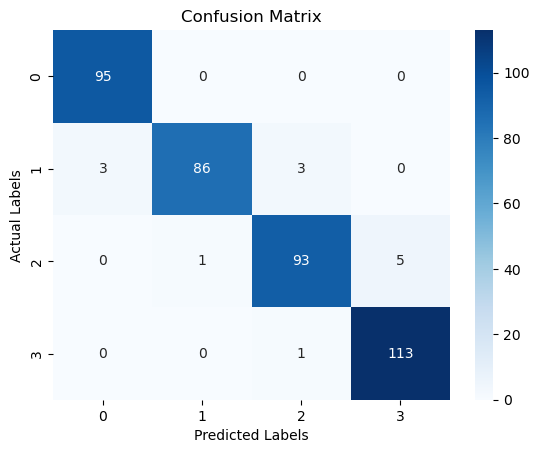

In [142]:
sns.heatmap(confusion_matrix(y_test,encoder.inverse_transform(y_pred.round())), annot=True, fmt='g', cmap = 'Blues')  #format = g, (general) to avoid scientific notation
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Classification Report and Model Summary

In [144]:
print(classification_report(y_test, encoder.inverse_transform(y_pred)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       0.99      0.93      0.96        92
           2       0.96      0.94      0.95        99
           3       0.96      0.99      0.97       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [145]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (100, 114)             │         2,394 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (100, 42)              │         4,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (100, 42)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (100, 106)             │         4,558 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (100, 106)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (100, 74)              │         7,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (100, 74)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (100, 4)               │           300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,002 (234.39 KB)

 Trainable params: 20,000 (78.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,002 (156.26 KB)